In [ ]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import cross_validation_report
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic classification data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

class_data = create_classification_data()
cv_result = cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    select_model=["LogisticRegression", "KNeighborsClassifier", "RandomForestClassifier", "SVC"]
    save_csv=False)

/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

In [2]:
from IPython.display import display
display(cv_result)

,LogisticRegression,KNeighborsClassifier,SVC,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,CatBoostClassifier,MLPClassifier
roc_auc_mean,0.764000,0.864000,0.931000,0.872000,0.899000,0.828000,0.817000,0.777000,0.888000,0.848000
roc_auc_std,0.121000,0.083000,0.067000,0.084000,0.077000,0.138000,0.144000,0.145000,0.093000,0.105000
roc_auc_median,0.806000,0.861000,0.944000,0.903000,0.917000,0.861000,0.847000,0.806000,0.917000,0.861000
roc_auc_fold1,0.555556,0.819444,0.888889,0.819444,0.722222,0.694444,0.527778,0.694444,0.861111,0.777778
roc_auc_fold2,0.861111,0.916667,0.916667,0.916667,0.888889,0.750000,0.791667,0.611111,0.861111,0.833333
...,...,...,...,...,...,...,...,...,...,...
neg_brier_score_fold21,-0.340943,-0.201458,-0.167452,-0.180433,-0.169692,-0.188182,-0.333319,-0.242462,-0.178568,-0.262469
neg_brier_score_fold22,-0.274422,-0.203750,-0.083955,-0.195325,-0.204142,-0.169953,-0.416551,-0.246761,-0.163584,-0.199434
neg_brier_score_fold23,-0.217476,-0.170833,-0.125102,-0.166092,-0.175033,-0.200012,-0.220346,-0.209144,-0.144072,-0.160187
neg_brier_score_fold24,-0.102624,-0.177292,-0.072697,-0.220333,-0.174342,-0.223155,-0.315378,-0.178253,-0.184812,-0.038657


In [3]:
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis

scoring_list = [
            "roc_auc",
            "average_precision",
            "accuracy",
            "recall",
            "precision",
            "f1",
            "neg_log_loss",
            "neg_brier_score",
        ]
report_long = StatisticalAnalysis.extract_scoring_dfs(report_df=cv_result, scoring_list=scoring_list)
display(report_long)

/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.loc[:, "scoring"] = scoring
/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.loc[:, "scoring"] = scoring
/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,scoring,cv_cycle,method,value
0,roc_auc,roc_auc_fold1,LogisticRegression,0.555556
1,roc_auc,roc_auc_fold2,LogisticRegression,0.861111
2,roc_auc,roc_auc_fold3,LogisticRegression,0.777778
3,roc_auc,roc_auc_fold4,LogisticRegression,0.777778
4,roc_auc,roc_auc_fold5,LogisticRegression,0.944444
...,...,...,...,...
1995,neg_brier_score,neg_brier_score_fold21,MLPClassifier,-0.262469
1996,neg_brier_score,neg_brier_score_fold22,MLPClassifier,-0.199434
1997,neg_brier_score,neg_brier_score_fold23,MLPClassifier,-0.160187
1998,neg_brier_score,neg_brier_score_fold24,MLPClassifier,-0.038657


In [4]:
var_report = StatisticalAnalysis.check_variance_homogeneity(report_long, scoring_list=scoring_list, levene_test=True)
display(var_report)

,variance_fold_difference,p_value
scoring,,
roc_auc,4.656455,3.413323e-02
average_precision,8.700796,6.790543e-05
accuracy,2.725166,3.419707e-01
recall,3.453333,4.487336e-01
precision,8.407524,8.382561e-06
f1,3.057373,7.671804e-01
neg_log_loss,1057.649067,3.019388e-28
neg_brier_score,50.502662,1.382738e-11


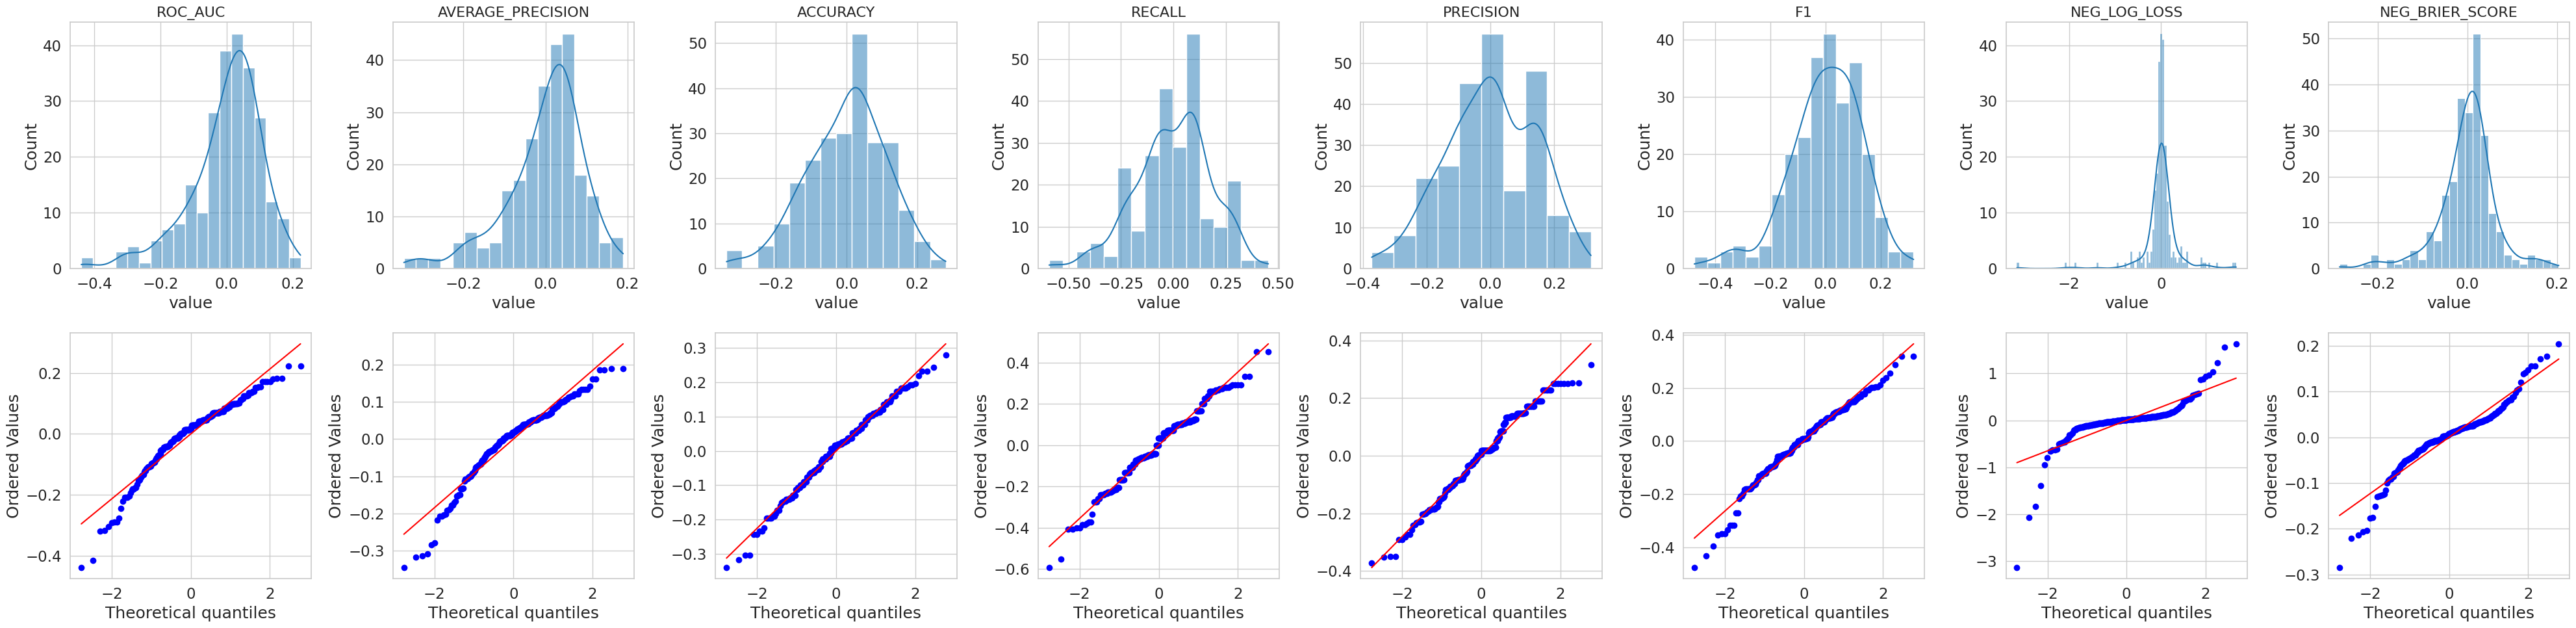

In [5]:
normal_report = StatisticalAnalysis.check_normality(report_long, scoring_list=scoring_list)

/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)
/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


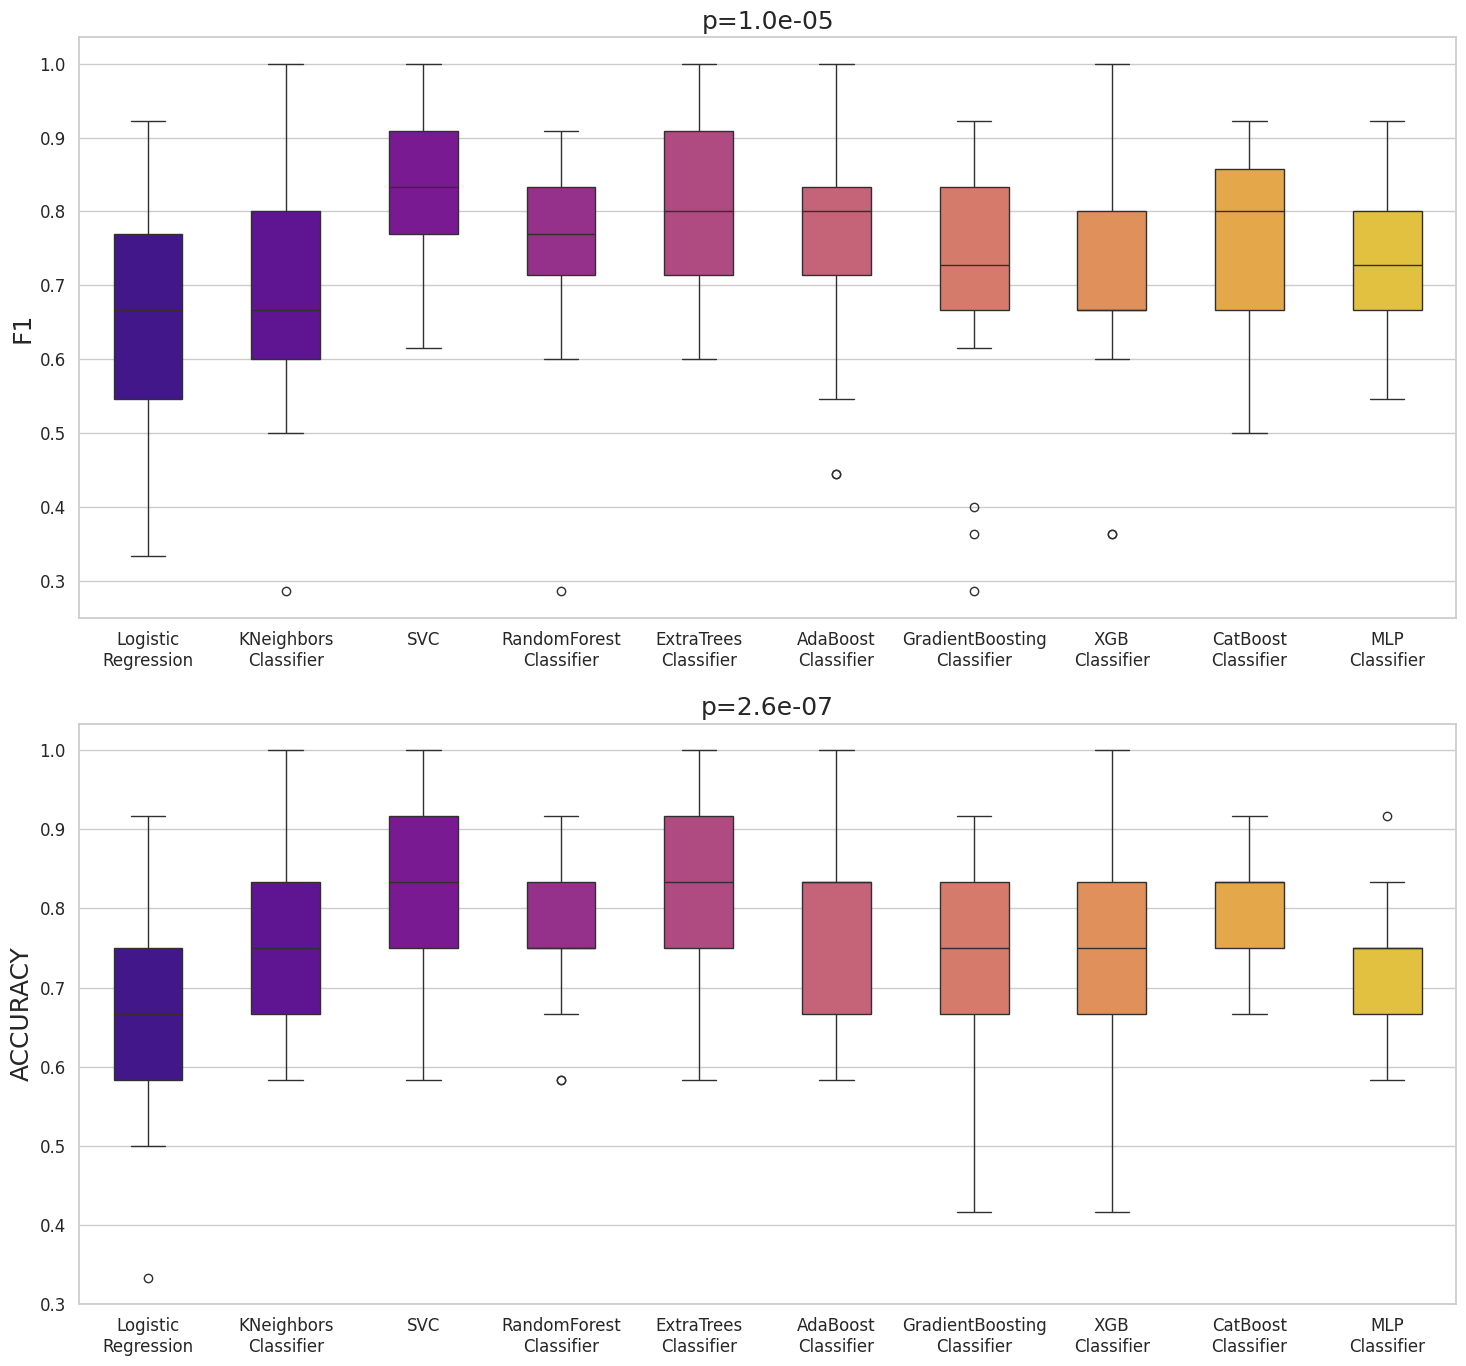

In [4]:
StatisticalAnalysis.test(report_long, scoring_list=["f1", "accuracy"])

/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)
/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)
/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)
/home/labhhc3/Documents/Workspace/Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklab

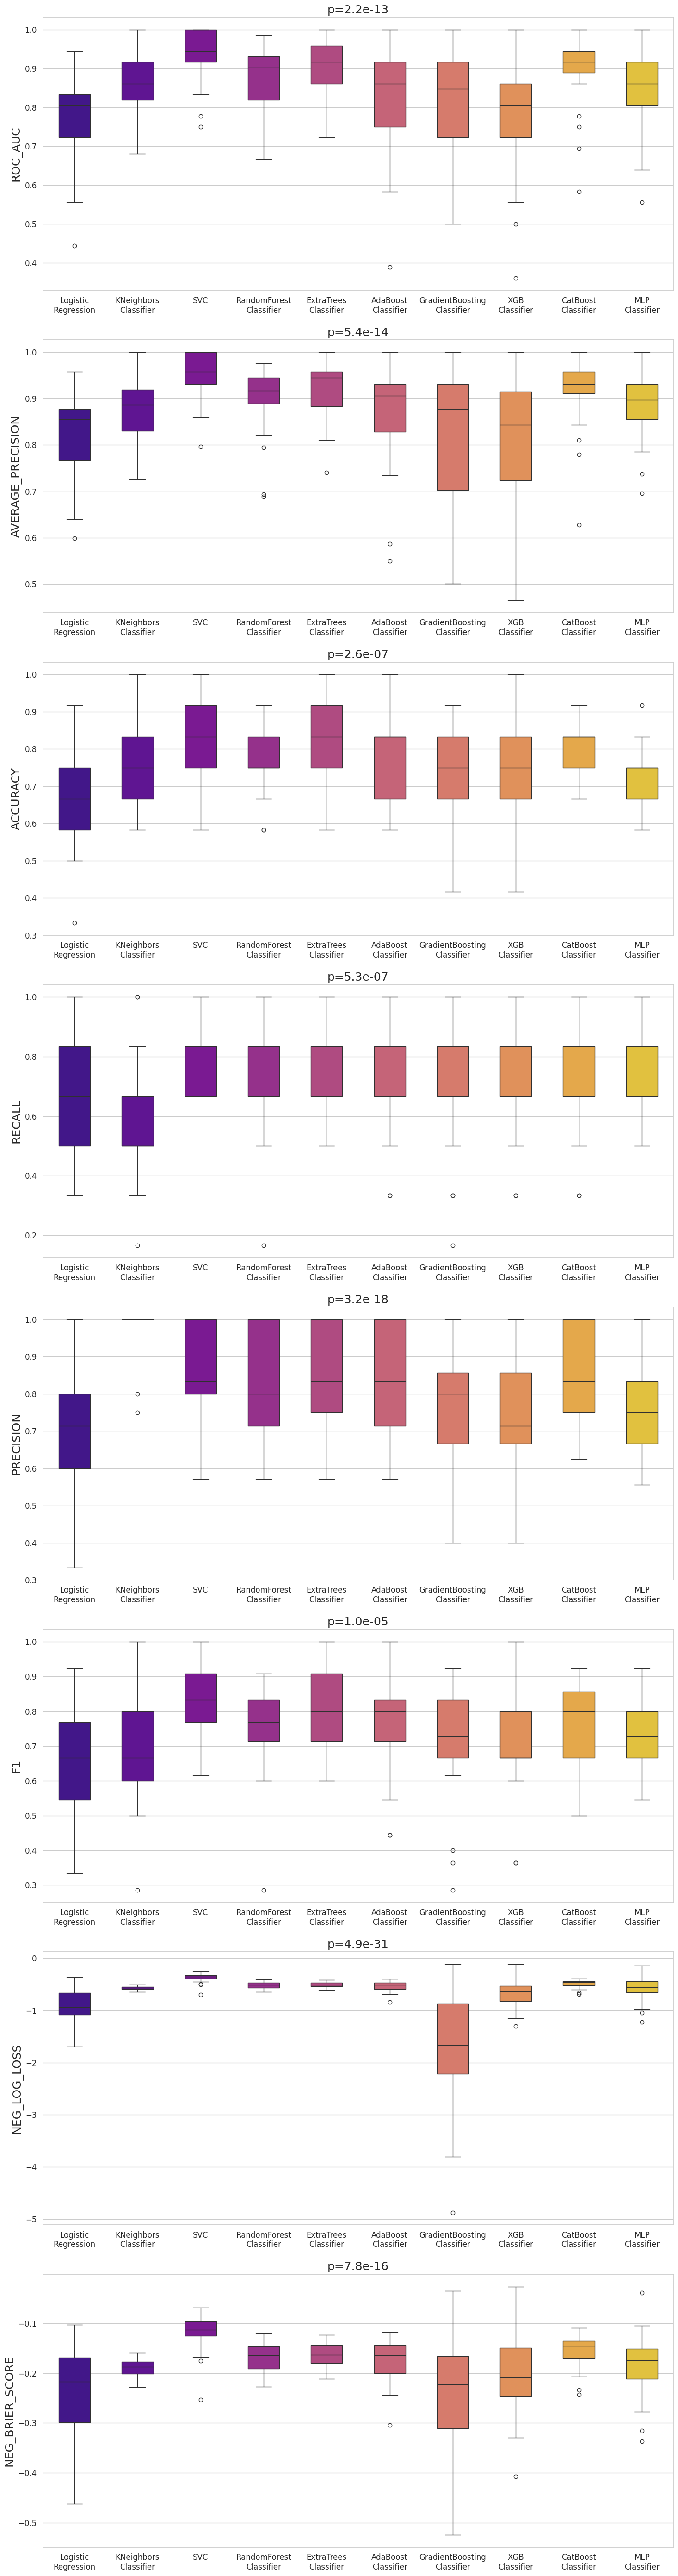

In [5]:
StatisticalAnalysis.test(report_long)

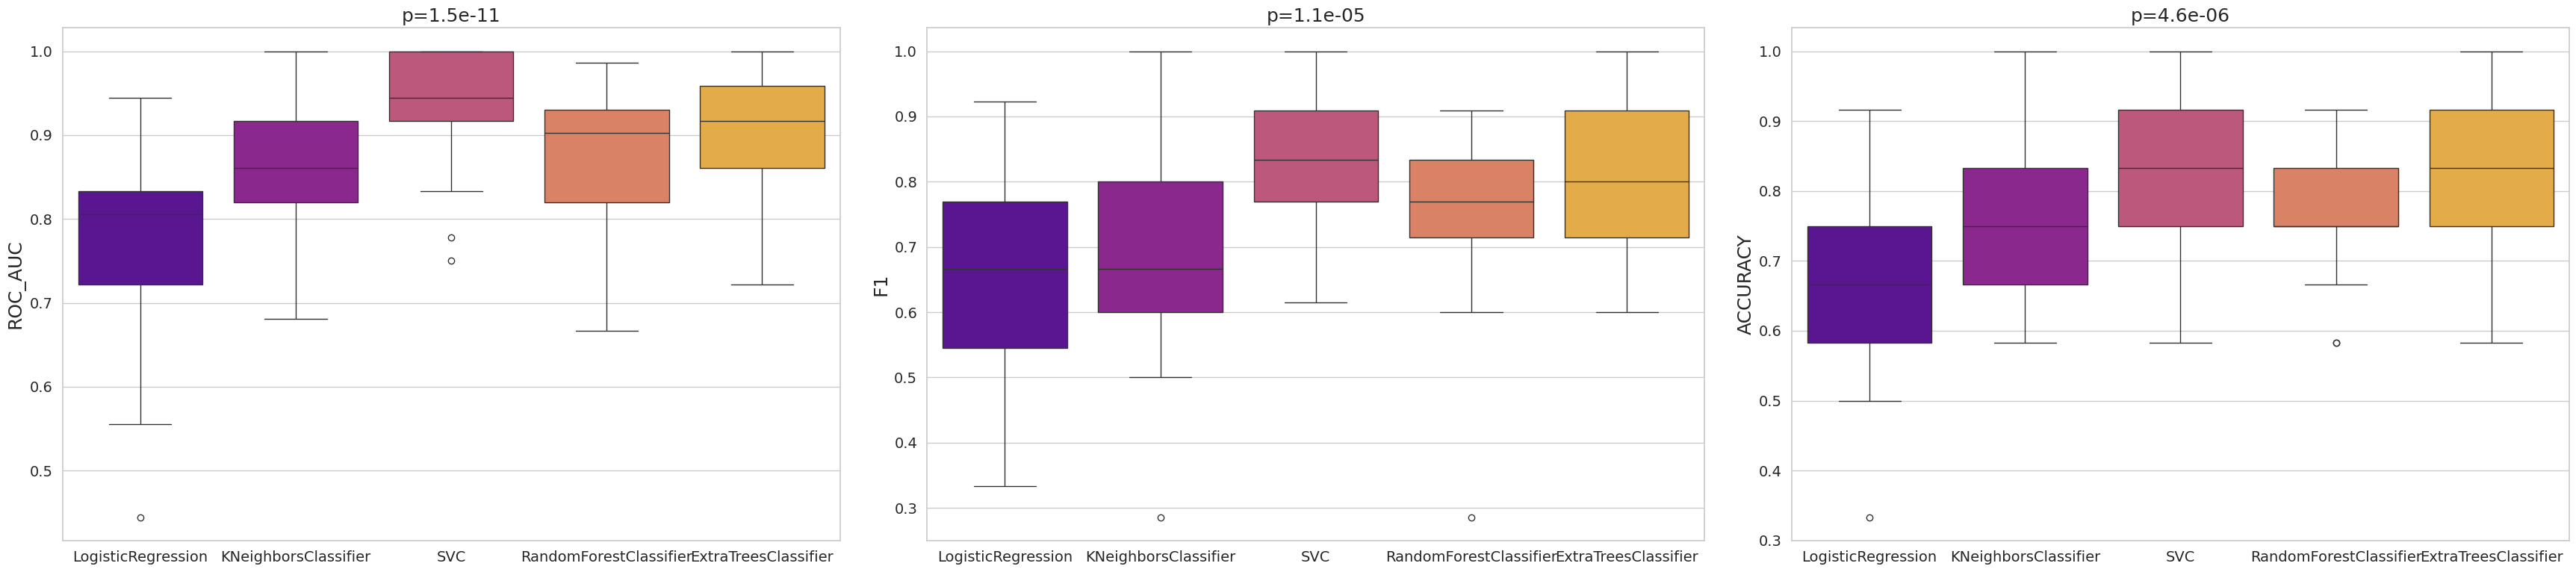

In [4]:
StatisticalAnalysis.test(report_long)

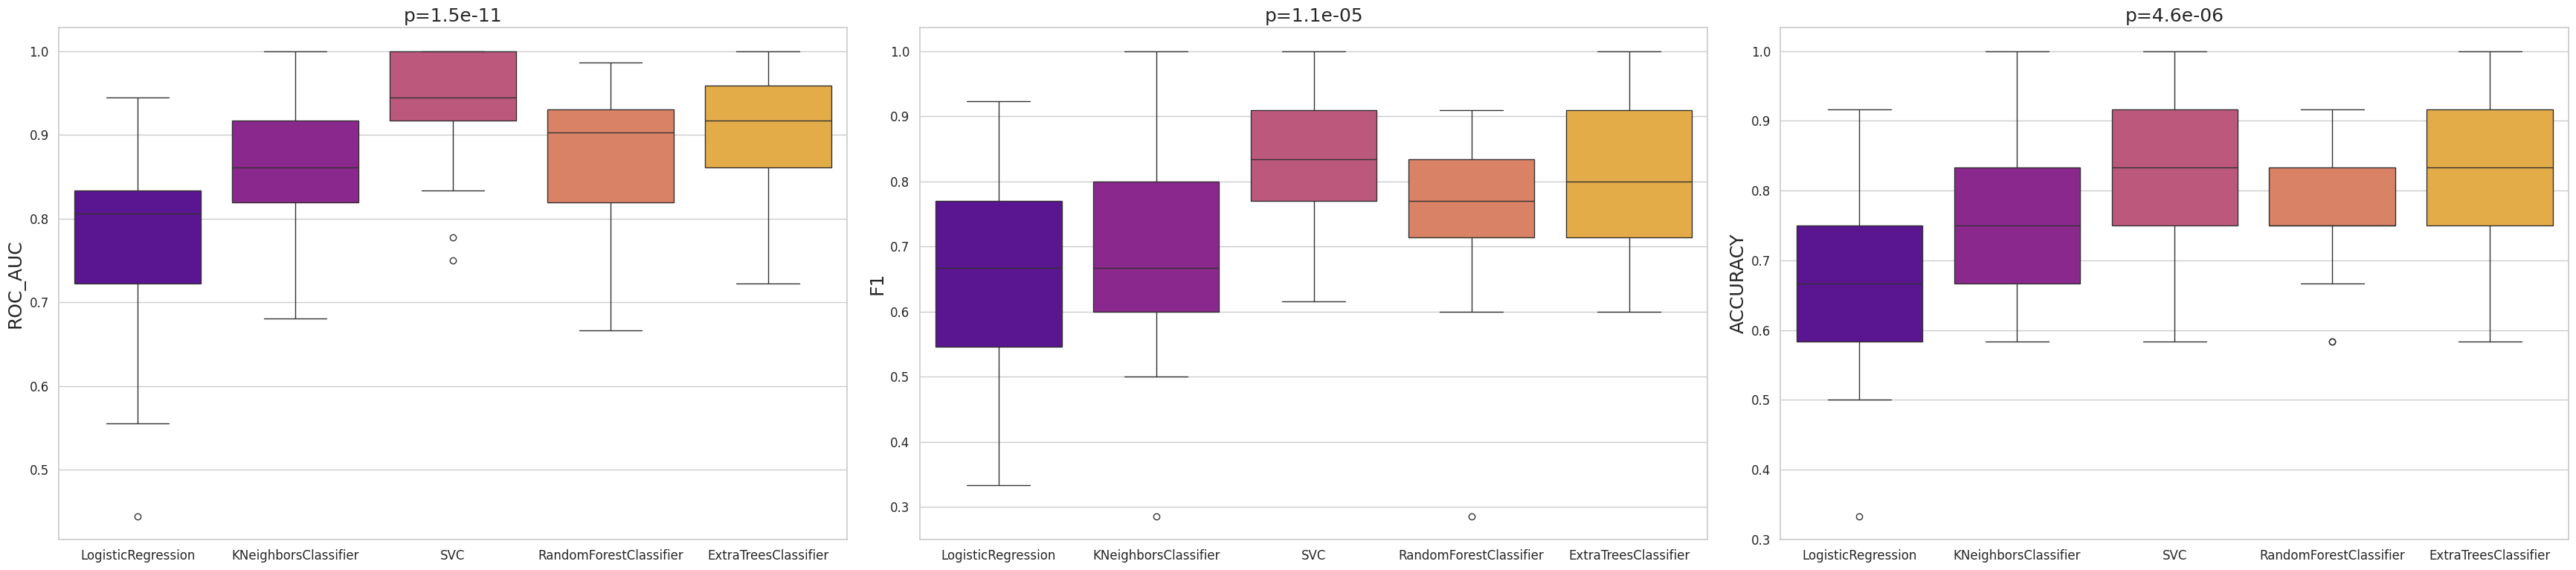

In [4]:
StatisticalAnalysis.test(report_long)

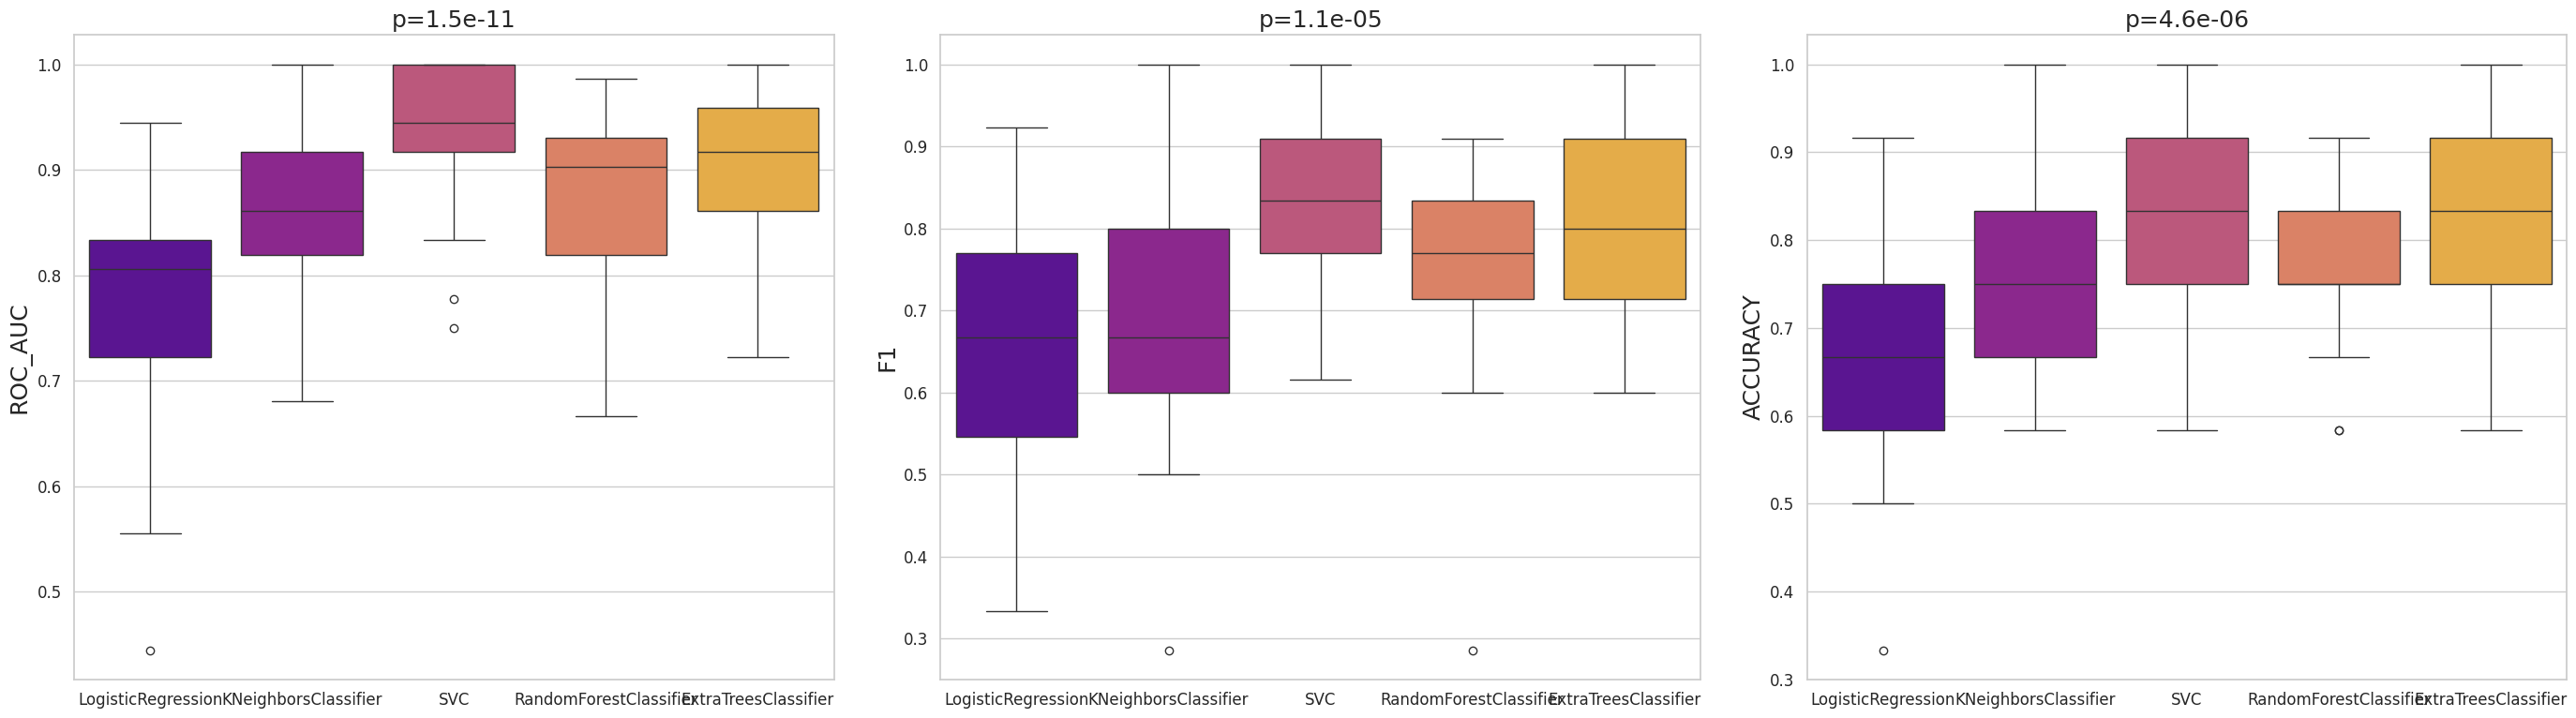

In [4]:
StatisticalAnalysis.test(report_long)

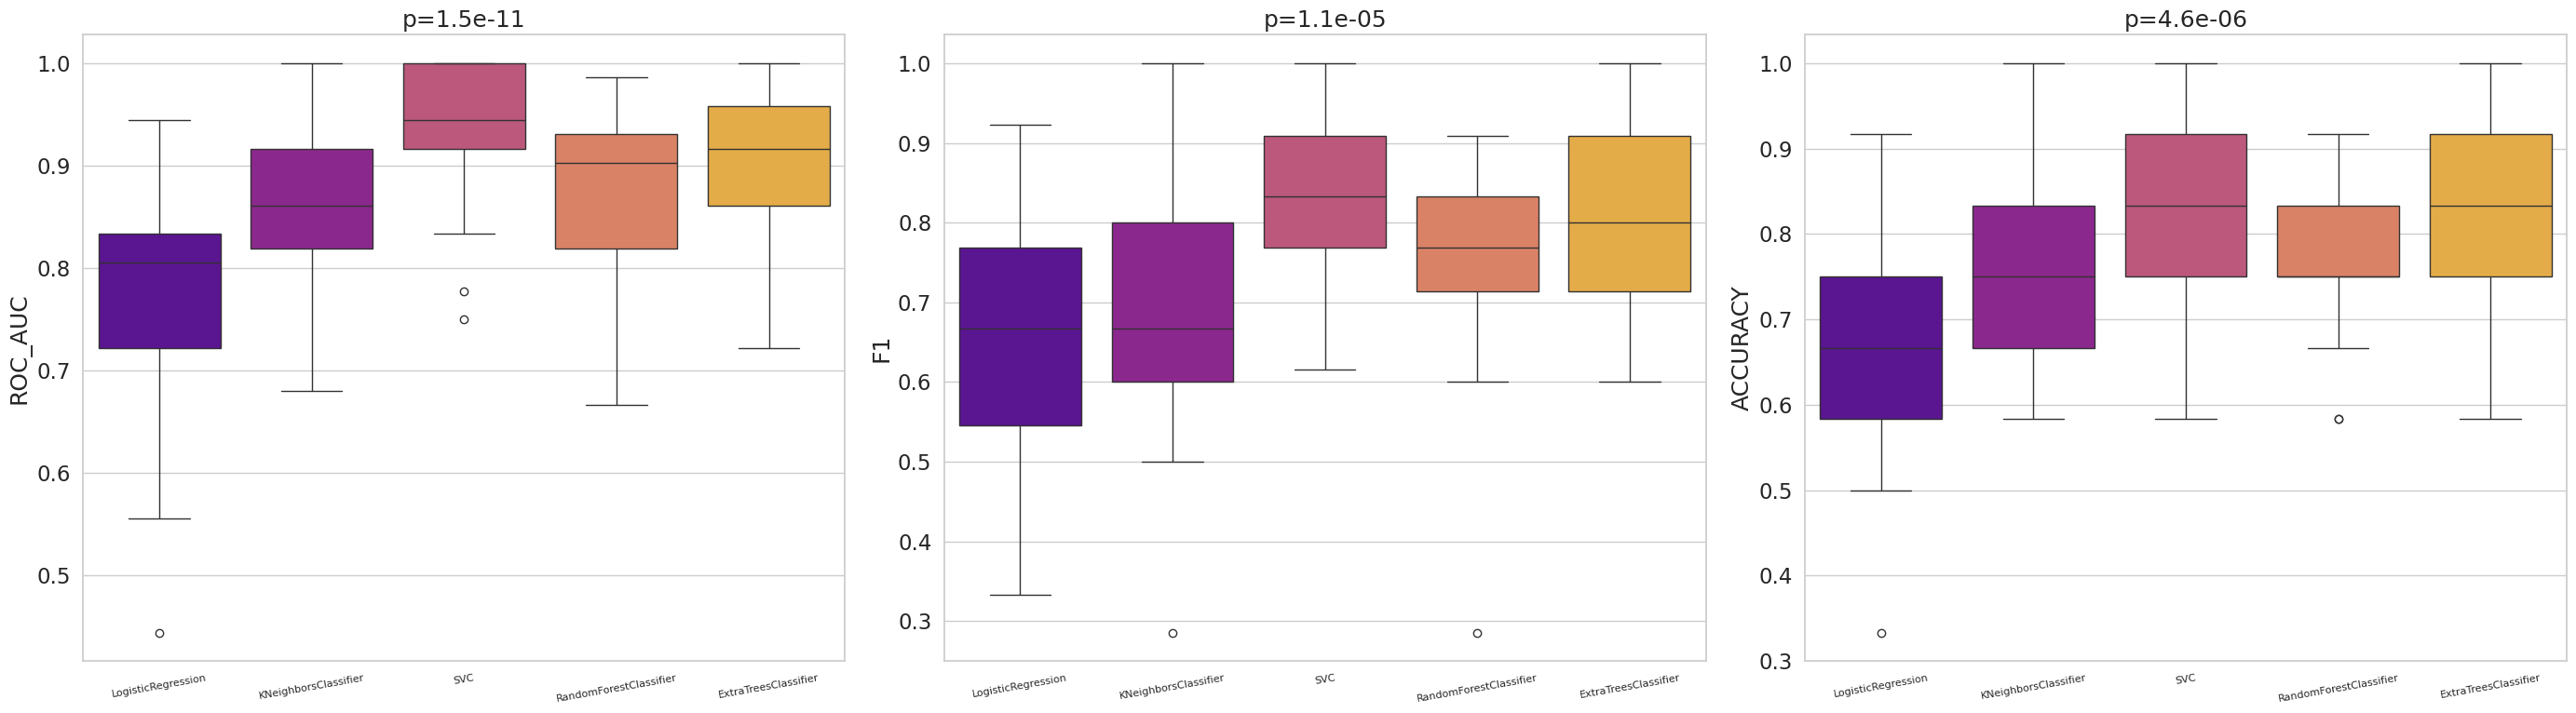

In [4]:
StatisticalAnalysis.test(report_long)

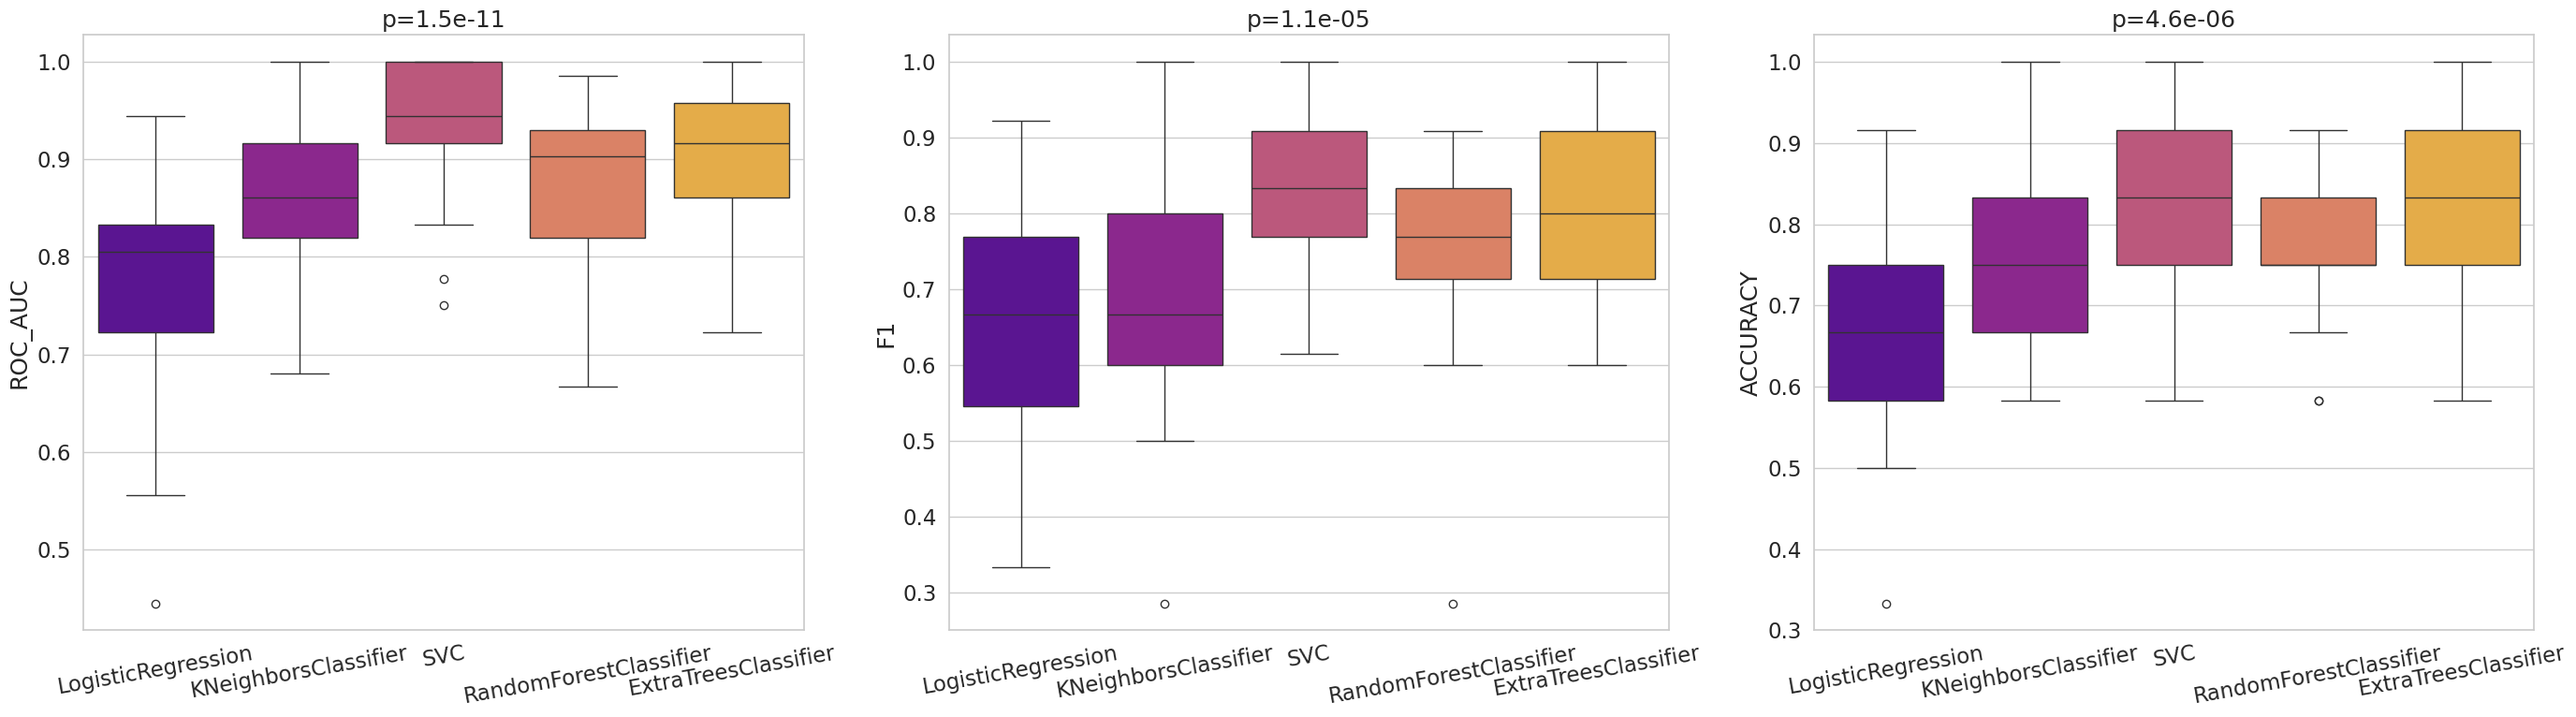

In [4]:
StatisticalAnalysis.test(report_long)

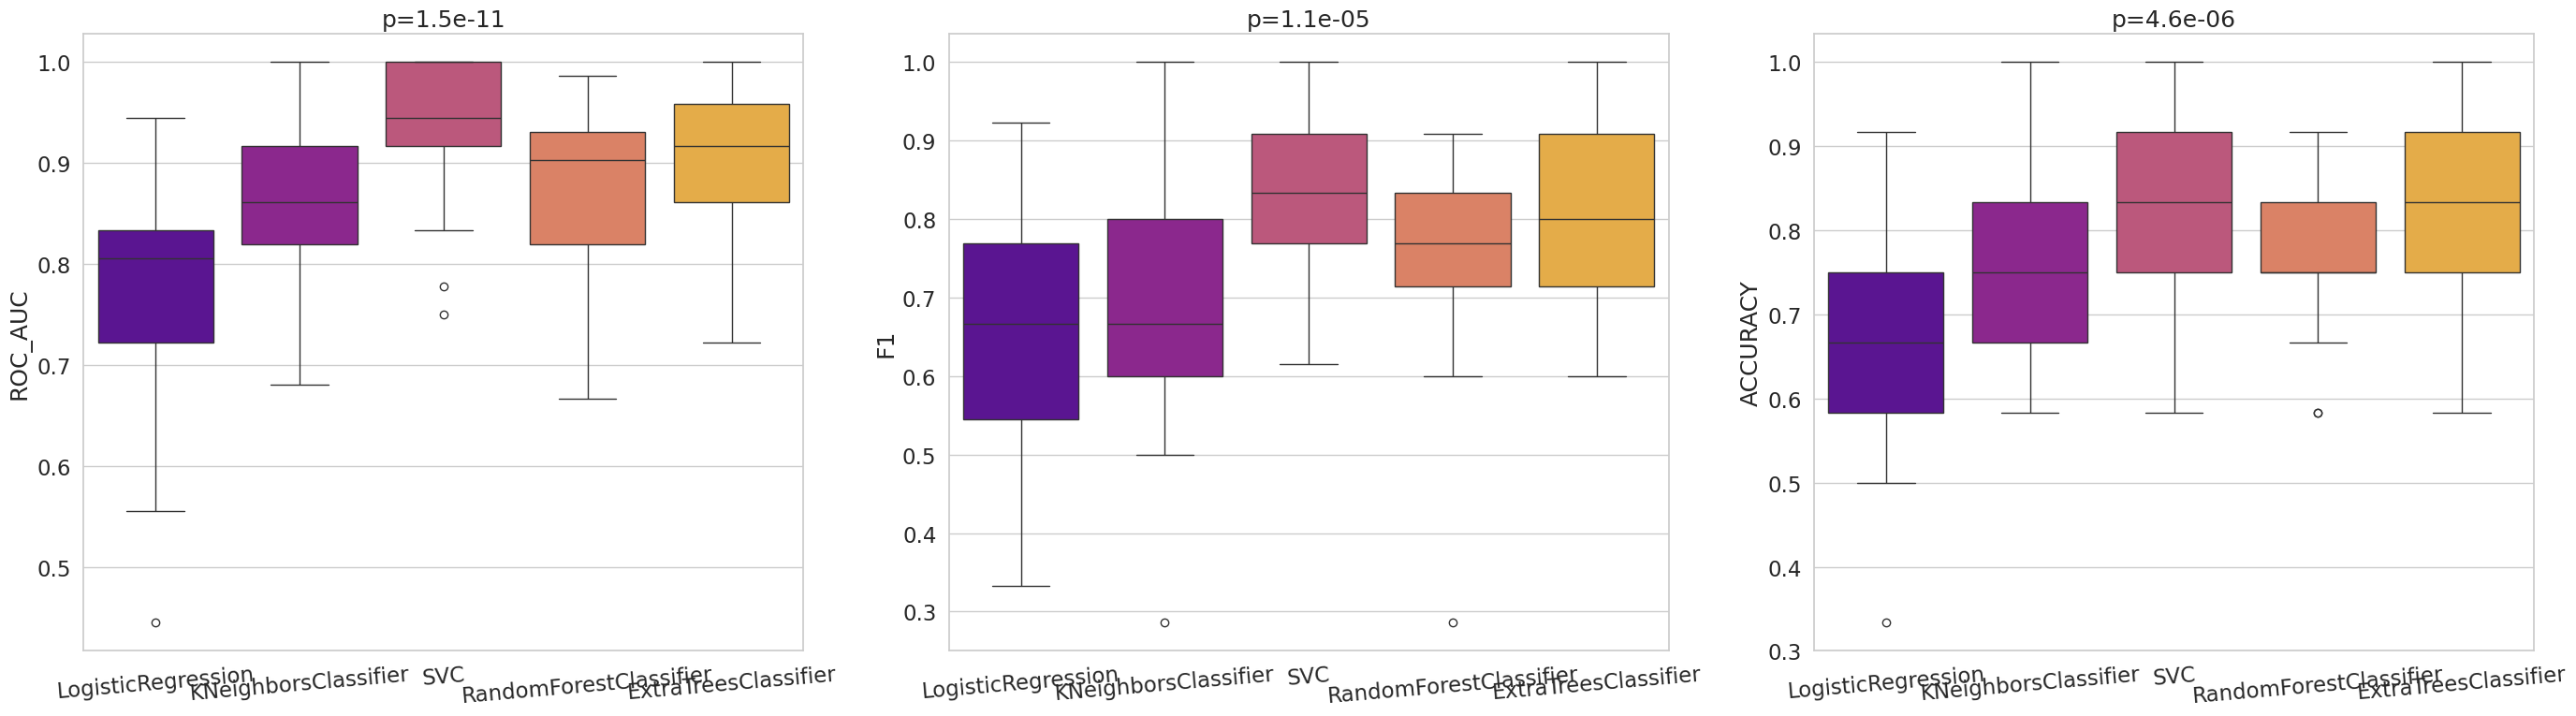

In [4]:
StatisticalAnalysis.test(report_long)

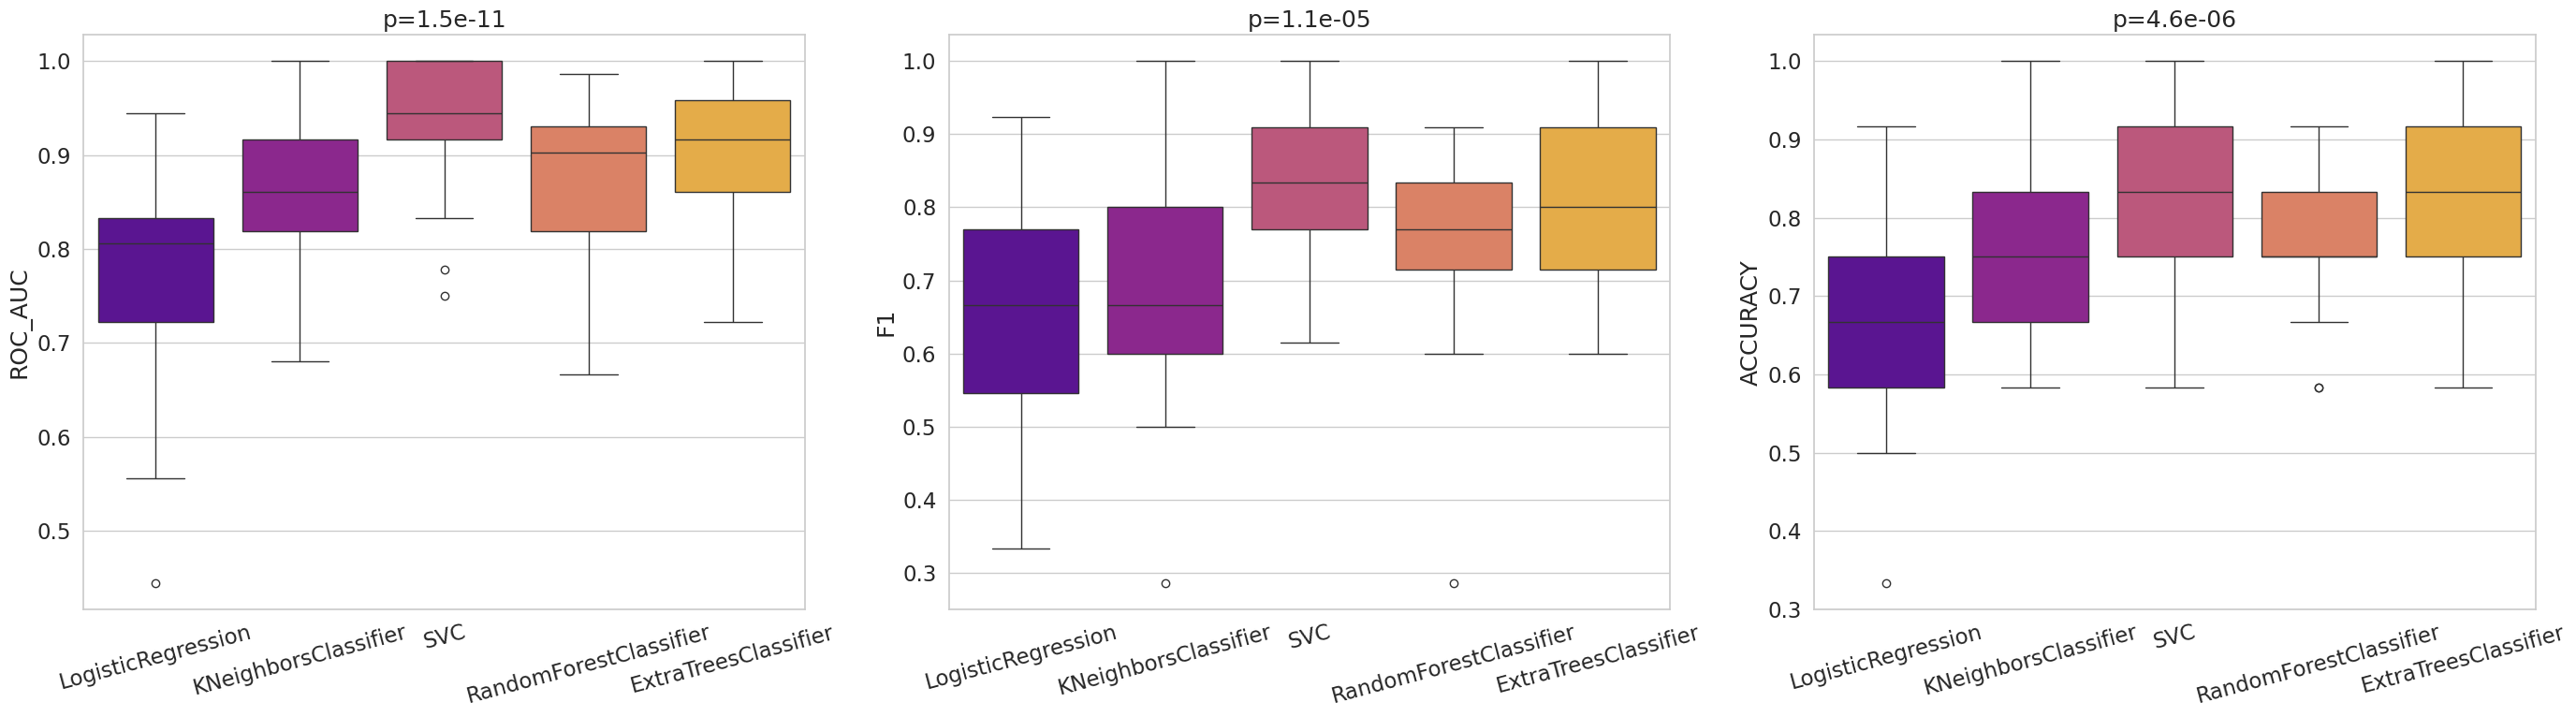

In [4]:
StatisticalAnalysis.test(report_long)

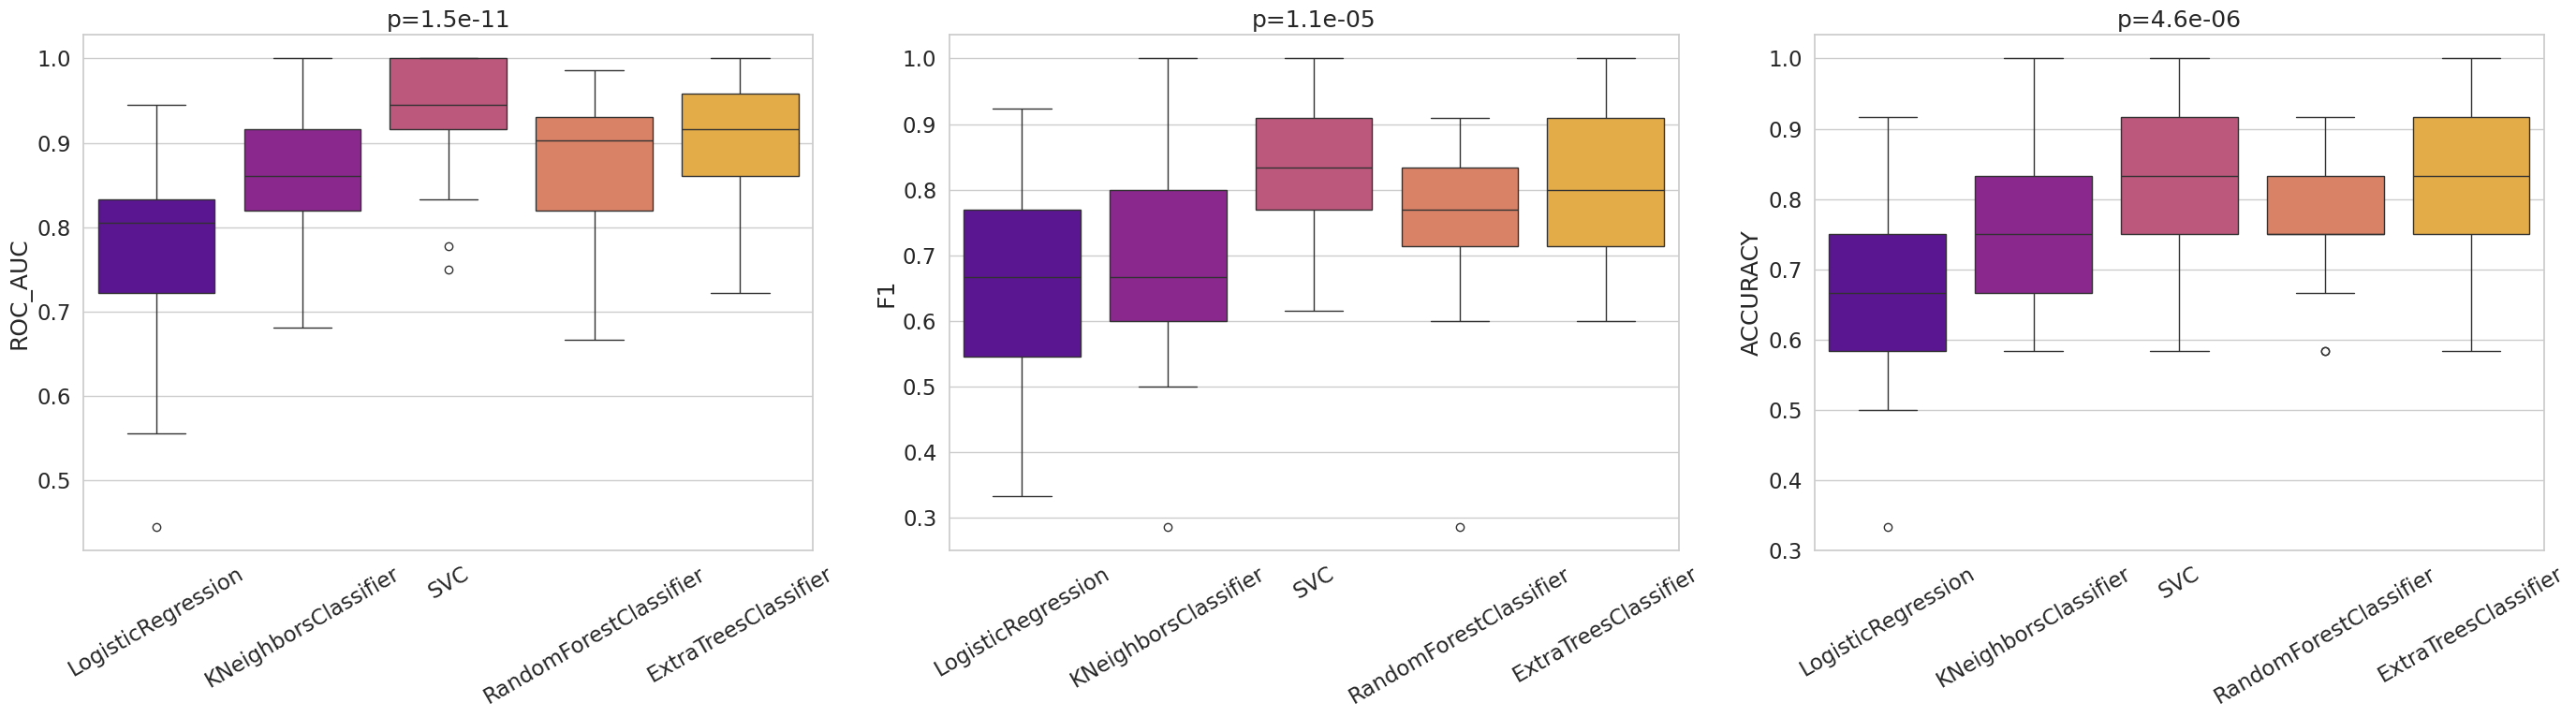

In [4]:
StatisticalAnalysis.test(report_long)

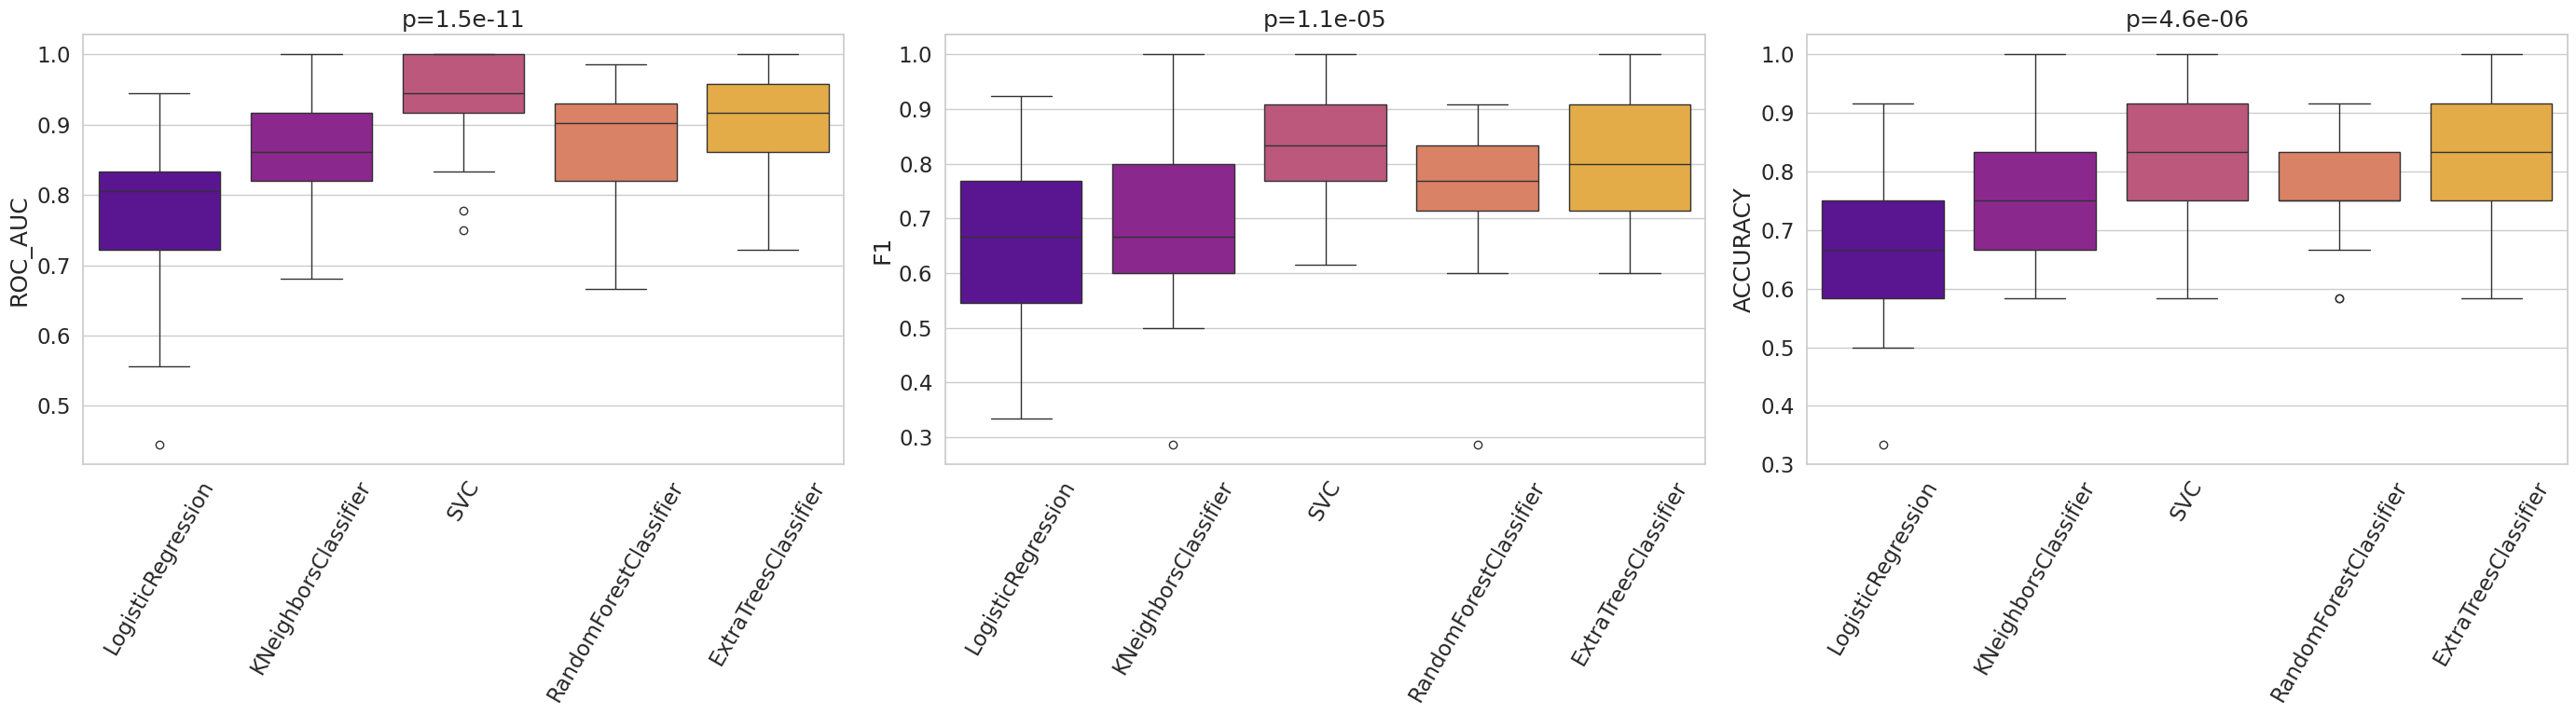

In [6]:
StatisticalAnalysis.test(report_long)

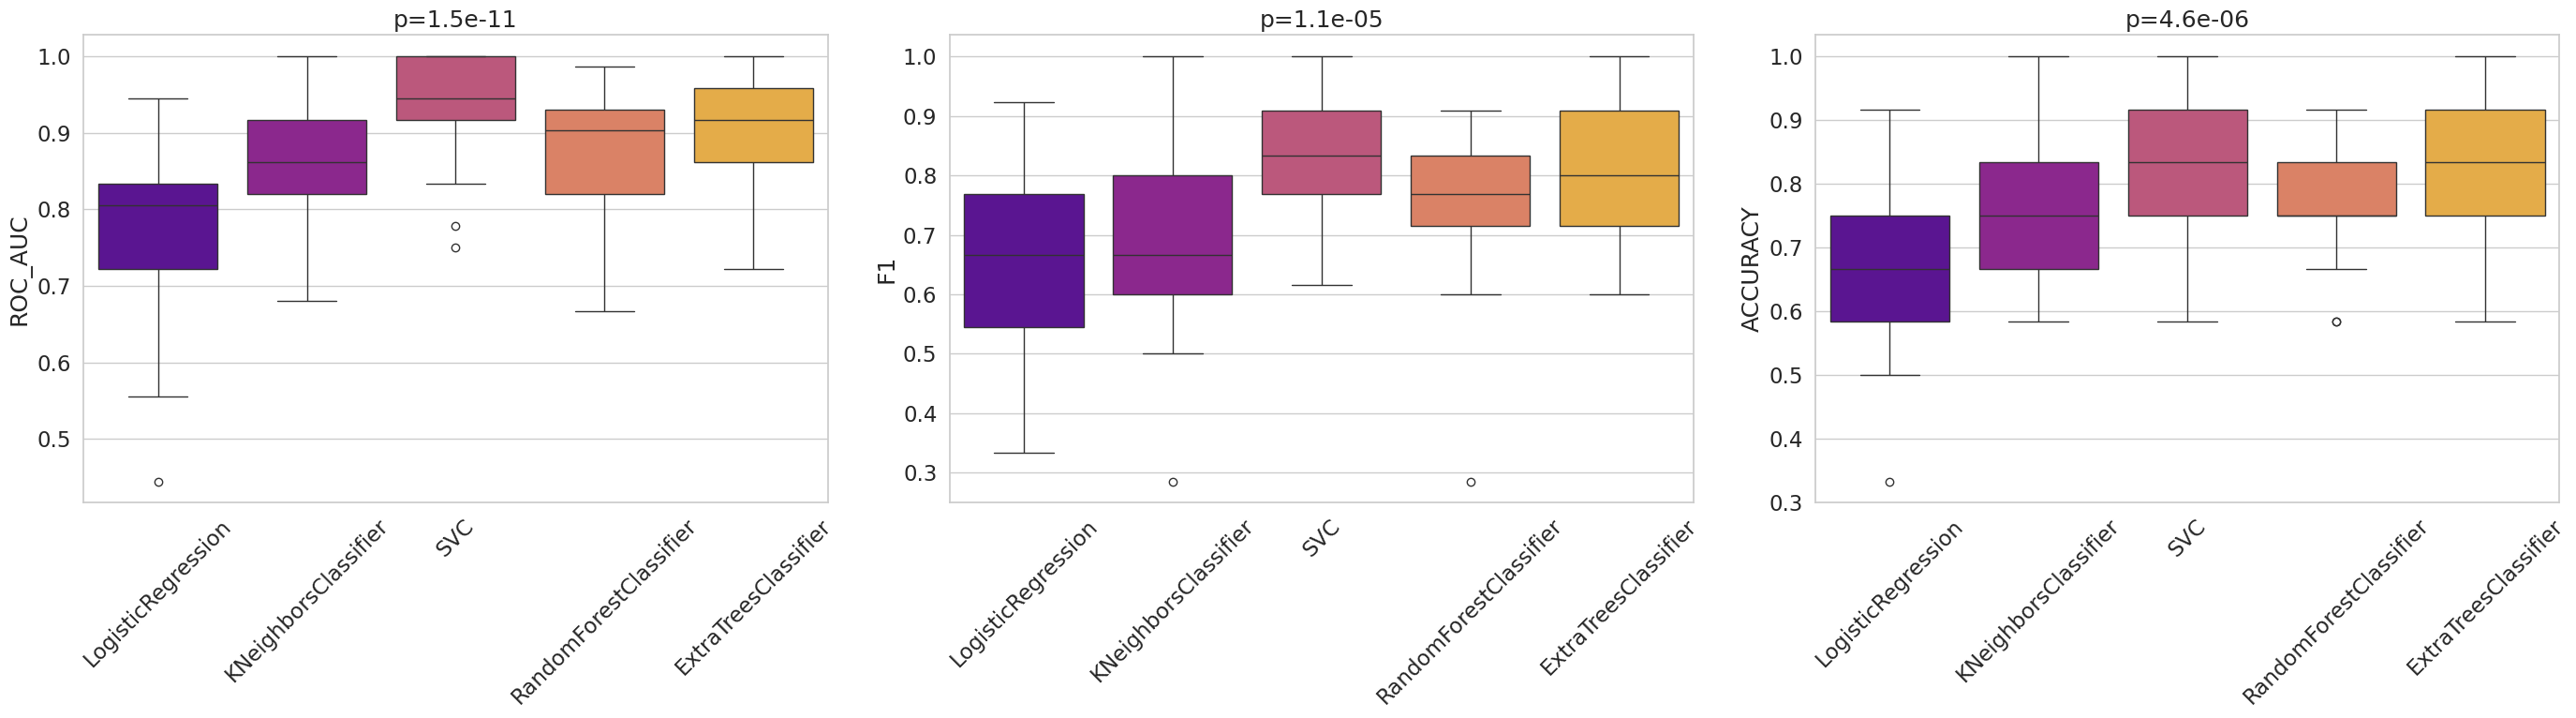

In [ ]:
StatisticalAnalysis.test(report_long)